# Data Gathering - Poll data

In [2]:
import gepd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 15)
import seaborn as sns
import matplotlib.pyplot as plt

## Getting Data

In [3]:
data = gepd.gepd()

In [4]:
df = data.get_surveys()

## Transforming collum names

In [5]:
parties_dict = data.get_parties()

In [6]:
def parties_dict_short_function(parties_dict):
    dct = {}
    for key, value in parties_dict.items():
        dct[key] = value["Shortcut"]
    return dct

In [7]:
parties_dict_short  = parties_dict_short_function(parties_dict)


In [8]:
parties_dict_short

{'7': 'AfD',
 '11': 'BP',
 '14': 'BVB/FW',
 '4': 'Grüne',
 '16': 'BIW',
 '1': 'CDU/CSU',
 '101': 'CDU',
 '102': 'CSU',
 '5': 'Linke',
 '13': 'Die PARTEI',
 '3': 'FDP',
 '8': 'Freie Wähler',
 '9': 'NPD',
 '15': 'Tierschutzpartei',
 '6': 'Piraten',
 '2': 'SPD',
 '10': 'SSW',
 '0': 'Sonstige'}

In [9]:
df = df.rename(columns=parties_dict_short)

In [10]:
df

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,SPD,AfD,CDU,Linke,FDP,Sonstige,Grüne,CDU/CSU,Freie Wähler,CSU,BP,Die PARTEI,SSW,BVB/FW,NPD,Piraten,BIW,Tierschutzpartei
0,2021-08-26,1153,8,1,95,2021-08-19,2021-08-24,36.0,17.0,15.0,11.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-25,1050,3,24,97,2021-08-23,2021-08-24,24.5,11.0,15.0,15.0,9.5,9.5,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-25,1096,0,7,41,2021-08-12,2021-08-18,21.0,12.0,NaN,7.0,13.0,8.0,17.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-25,1160,3,1,16,2021-08-18,2021-08-21,23.0,11.0,19.0,12.0,8.0,10.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-25,10054,0,16,14,2021-08-18,2021-08-25,22.0,12.0,NaN,7.0,12.0,7.0,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,2017-01-25,2504,0,2,2,2017-01-16,2017-01-20,21.0,12.0,NaN,9.0,6.0,5.0,10.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1741,2017-01-24,5028,0,16,14,2017-01-12,2017-01-23,20.4,13.2,NaN,9.5,6.2,4.3,9.3,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1742,2017-01-24,1992,0,5,4,2017-01-20,2017-01-23,21.0,14.5,NaN,11.0,7.5,5.0,8.5,32.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1743,2017-01-22,2805,0,3,3,2017-01-12,2017-01-18,21.0,12.0,NaN,11.0,6.0,5.0,9.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Date to 120 days

In [11]:
df["Date"] =  pd.to_datetime(df["Date"], format= "Y-M-D")

In [69]:
start_date = "2021-04-20"
end_date = "2021-08-24"

In [70]:
df_dated = df.loc[(df['Date'] > start_date) & (df['Date'] <= end_date)]

## Eliminating useless collumns

In [71]:
df_dated = df_dated.fillna(0)

In [72]:
other_parties = ["Sonstige", "CDU", "Freie Wähler", "CSU", "BP","Die PARTEI", "SSW", "BVB/FW", "NPD", "Piraten",\
                    "BIW", "Tierschutzpartei"]

In [73]:
df_dated["other"] =  df_dated[other_parties].sum(axis=1)

In [74]:
df_dated

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,SPD,AfD,CDU,Linke,FDP,Sonstige,Grüne,CDU/CSU,Freie Wähler,CSU,BP,Die PARTEI,SSW,BVB/FW,NPD,Piraten,BIW,Tierschutzpartei,other
6,2021-08-24,2504,0,2,63,2021-08-17,2021-08-23,23.0,10.0,0.0,6.0,12.0,9.0,18.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
7,2021-08-23,2119,0,5,4,2021-08-20,2021-08-23,23.0,11.0,0.0,7.0,13.0,6.0,17.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
8,2021-08-22,1352,0,5,3,2021-08-16,2021-08-20,22.0,12.0,0.0,7.0,13.0,7.0,17.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
9,2021-08-20,1179,13,1,30,2021-08-13,2021-08-18,11.0,21.0,35.0,10.0,6.0,6.0,7.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
10,2021-08-19,1219,0,1,1,2021-08-17,2021-08-18,21.0,11.0,0.0,7.0,13.0,8.0,17.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2021-04-23,1000,0,5,4,2021-04-23,2021-04-23,17.0,11.0,0.0,8.0,12.0,5.0,23.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
165,2021-04-23,1202,14,1,30,2021-04-16,2021-04-21,12.0,20.0,27.0,12.0,8.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
166,2021-04-21,10064,0,16,14,2021-04-14,2021-04-21,15.0,10.0,0.0,7.0,9.0,6.0,25.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
167,2021-04-21,1051,0,9,6,2021-04-06,2021-04-15,16.5,9.5,0.0,7.5,10.0,5.5,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5


In [75]:
df_dated = df_dated.drop( columns = other_parties ).drop( columns = ["Parliament_ID","Institute_ID", "Tasker_ID"] )


### Removing repeated dates with mean

In [76]:
df_dated_grouped = df_dated.groupby(by = "Date").mean()

In [77]:
pd.date_range(start = start_date, end = end_date ).difference(df_dated.Date).value_counts().sum()

34

In [78]:
## we have 37 missing values

### Adding missing dates

In [79]:
correct_dates = pd.DataFrame(pd.date_range(start = start_date, end = end_date ))

In [80]:
correct_dates

,0
0,2021-04-20
1,2021-04-21
2,2021-04-22
3,2021-04-23
4,2021-04-24
...,...
122,2021-08-20
123,2021-08-21
124,2021-08-22
125,2021-08-23


In [81]:
df_dated = correct_dates.merge(df_dated_grouped, how = "left", left_on= 0 , right_on = ["Date" ])

In [82]:
df_dated = df_dated.set_index([0])

In [83]:
df_dated = df_dated.where(df_dated.notnull() , other=(df_dated.fillna(method='ffill')\
                                                           + df_dated.fillna(method='bfill'))/2)


In [84]:
df_dated.isna().value_counts()

Surveyed_Persons  SPD    AfD    Linke  FDP    Grüne  CDU/CSU  other
False             False  False  False  False  False  False    False    126
True              True   True   True   True   True   True     True       1
dtype: int64

### Removing first two and last two values

In [92]:
df_final =  df_dated[6:].round(2)


In [93]:
df_final

,Surveyed_Persons,SPD,AfD,Linke,FDP,Grüne,CDU/CSU,other
Date,,,,,,,,
2021-04-26,10039.00,15.0,9.00,6.0,11.00,29.00,24.00,6.0
2021-04-27,2082.00,16.0,12.00,8.0,12.00,23.00,23.00,6.0
2021-04-28,1689.67,13.0,9.67,8.0,8.67,26.33,7.33,27.0
2021-04-29,1042.00,10.0,24.00,13.0,6.00,12.00,0.00,35.0
2021-04-30,1643.00,14.0,11.00,8.0,11.00,25.00,24.00,7.0
...,...,...,...,...,...,...,...,...
2021-08-20,1179.00,11.0,21.00,10.0,6.00,7.00,0.00,45.0
2021-08-21,1265.50,16.5,16.50,8.5,9.50,12.00,11.00,26.0
2021-08-22,1352.00,22.0,12.00,7.0,13.00,17.00,22.00,7.0


In [94]:
df_final.index.name = 'Date'

In [31]:
df_final["Surveyed_Persons"] = df_final["Surveyed_Persons"].astype(int)

In [32]:
df_final =df_final.round(2)

In [95]:
df_final.to_csv("pools_data_2021_v2.csv")

### Plotting

In [34]:
parties = ["CDU/CSU",  "Grüne", "FDP", "AfD","Linke" ]

<AxesSubplot:xlabel='Date', ylabel='2021-08-23 00:00:00'>

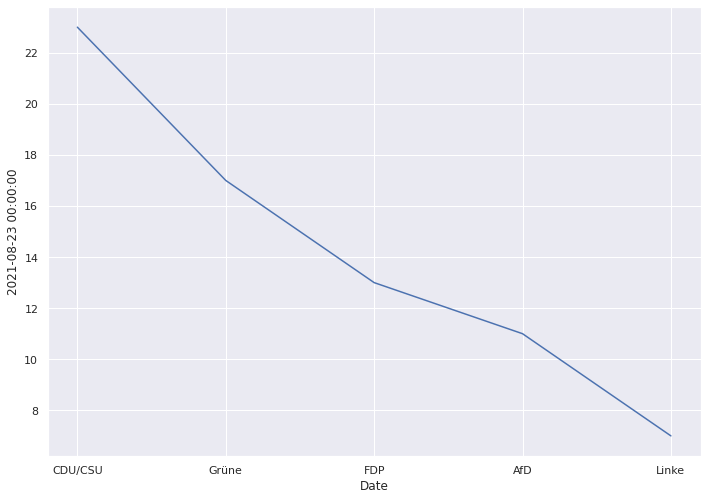

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot( data = df_final[parties])


In [96]:
df_twitter = df.groupby([pd.Grouper(key='created_at',freq='D'), "party"]).agg({
    "replies_count": "sum", 
    "retweets_count": "sum",
    "likes_count": "sum",
    "avg_len_of_tweet": "mean" ,
    "share_of_tweets" :"mean",
    "share_unique_users": "mean",
    "weighted_sentiment" : "mean",
    "share_of_positive_tweets": "mean",
    "share_of_negative_tweets" : "mean"}) 

KeyError: 'The grouper name created_at is not found'